# Pix2Pix : Aerial images to maps

Work based on : "**Image-to-Image Translation with Conditional Adversarial Networks**" 

(See [arXiv:1611.07004v3 [cs.CV]](https://arxiv.org/abs/1611.07004) by Phillip Isola, Jun-Yan Zhu, Tinghui Zhou and Alexei A. Efros - [Project Homepage](https://github.com/phillipi/pix2pix) )


(NEW) See also https://www.tensorflow.org/alpha/tutorials/generative/pix2pix in Tensorflow 2.0

----------------------
## Jupyter Notebook LOCAL execution
----------------------

*Just a Regular Notebook using Tensorflow 1.12.0 and that you can run anywhere*

#### Get Ready for local notebook execution

In [1]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

import os

# Import PiX2Pix code 
from utils import *
from download_dataset import *
from prepare_dataset import *
from train_pix2pix import *

In [ ]:
# Check that local configuration is ok to execute this Pix2Pix implementation
check_config()

In [2]:
# Eventually do some cleaning
!rm -f ./datasets/maps_train.tfrecords
!rm -rf ./tf-logs/*
!rm -rf ./outputs/*
!rm -rf ./models/*
#!rm -rf ./datasets/*

**Tensorboard** : Execute the command below to launch Tensorboard and embed its display in this Jupyter Notebook (You may need to reload the cell to refresh the display after the Tensorborad server startup)

### Define - Hyper parameters

In [3]:
URL = "https://people.eecs.berkeley.edu/~tinghuiz/projects/pix2pix/datasets/maps.tar.gz"
FILE_NAME = "maps.tar.gz"

# Local Directories
KERAS_CACHE_DIR = "./"
PATH_TO_TFRECORDS = "./datasets/maps_train.tfrecords"
PATH_TO_TF_LOGS = "./tf-logs"
PATH_TO_OUTPUTS = "./outputs"
PATH_TO_CHECKPOINTS ="./models"

# Perform a Full Training
EPOCHS = 200
SAVE_EVERY = 1000
EARLY_STOP = -1

### Step 1 - Download Dataset

In [4]:
img_path = download_dataset(fname=FILE_NAME, origin=URL, cachedir=KERAS_CACHE_DIR) 

250249216/250242400 [==============================] - 180s 1us/step
Path location to the dataset images is ./datasets/maps/
./datasets/maps/ contains ['val', 'train']


### Step 2 - Prepare the Dataset (Small subset) :

Spit the training image examples into Input/target images and Serialize them into a TFRecord file. (Additionally, display a few images examples from the training dataset)

[INFO] 0 images processed into the TFRecord file
[INFO] 100 images processed into the TFRecord file
[INFO] 200 images processed into the TFRecord file
[INFO] 300 images processed into the TFRecord file
[INFO] 400 images processed into the TFRecord file
[INFO] 500 images processed into the TFRecord file
[INFO] 600 images processed into the TFRecord file
[INFO] 700 images processed into the TFRecord file
[INFO] 800 images processed into the TFRecord file
[INFO] 900 images processed into the TFRecord file
[INFO] 1000 images processed into the TFRecord file

[INFO] Processing is finised: 1095 jpeg images processed into ./datasets/maps_train.tfrecords

Displaying 988.jpg (size 600x600)


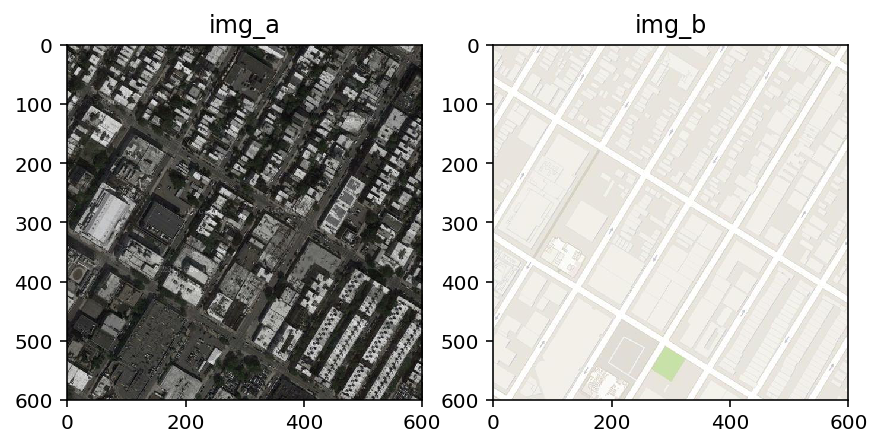

Displaying 342.jpg (size 600x600)


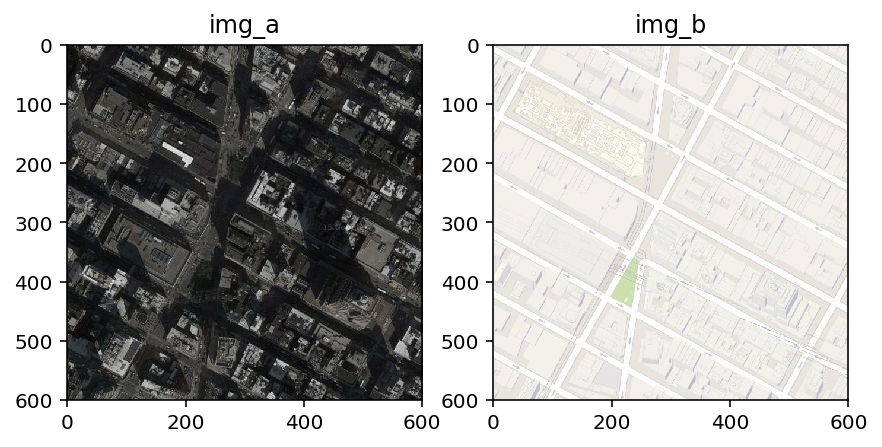

./datasets/maps_train.tfrecords contains 1095 images


In [5]:
path_to_tfrecords = prepare_dataset(img_path,'train/', PATH_TO_TFRECORDS, earlystop=EARLY_STOP) 

display_dataset_examples(PATH_TO_TFRECORDS, display_max_examples=2)

### Step 3 - Local Training of  the model (on a small Dataset subset)

In [6]:
results = train_pix2pix(PATH_TO_TFRECORDS, PATH_TO_TF_LOGS, PATH_TO_OUTPUTS, PATH_TO_CHECKPOINTS,
                        epochs=EPOCHS, initialresize=286, cropresize=256, resizemethod=2,
                        saveevery=SAVE_EVERY, earlystop=EARLY_STOP)


[INFO][Build u-net] unet_input_(1, 256, 256, 3)

[INFO][Build u-net encoder] unet_enc_0 layer output shape=(1, 128, 128, 64)
[INFO][Build u-net encoder] unet_enc_1 layer output shape=(1, 64, 64, 128)
[INFO][Build u-net encoder] unet_enc_2 layer output shape=(1, 32, 32, 256)
[INFO][Build u-net encoder] unet_enc_3 layer output shape=(1, 16, 16, 512)
[INFO][Build u-net encoder] unet_enc_4 layer output shape=(1, 8, 8, 512)
[INFO][Build u-net encoder] unet_enc_5 layer output shape=(1, 4, 4, 512)
[INFO][Build u-net encoder] unet_enc_6 layer output shape=(1, 2, 2, 512)
[INFO][Build u-net encoder] unet_enc_7 layer output shape=(1, 1, 1, 512)
[INFO][Build u-net decoder] unet_dec_0 layer output shape=(1, 2, 2, 1024)
[INFO][Build u-net decoder] unet_dec_1 layer output shape=(1, 4, 4, 1024)
[INFO][Build u-net decoder] unet_dec_2 layer output shape=(1, 8, 8, 1024)
[INFO][Build u-net decoder] unet_dec_3 layer output shape=(1, 16, 16, 1024)
[INFO][Build u-net decoder] unet_dec_4 layer output shape=(

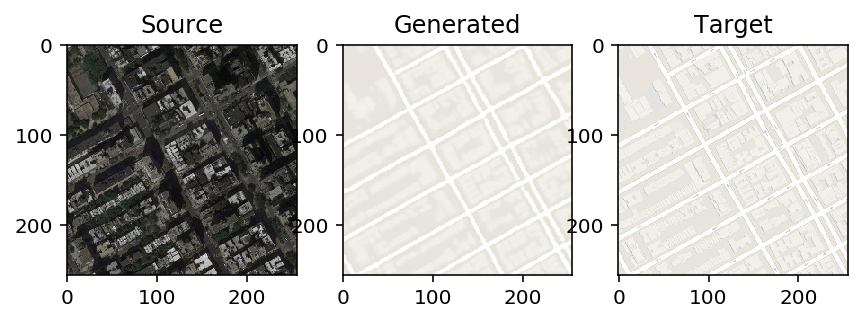

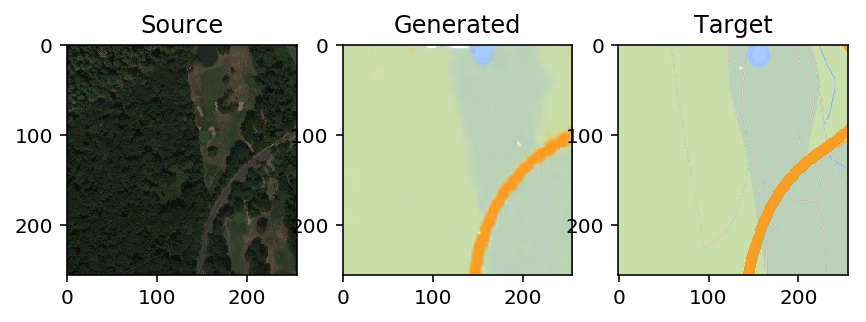

In [7]:
# Display Training examples
display_training_examples(results, display_max_examples=2, reverse=True)
